In [9]:
from pydantic import BaseSettings
from pathlib import Path

import os
import rasterio as rio
import numpy as np
from PIL import Image

In [2]:
os.chdir("..")
os.getcwd()

'/home/arnaudo/links/dydas/solar-panels-segmentation'

In [3]:
# setup a few variables and stuff from environment
class NbSettings(BaseSettings):
    class Config:
        env_file = ".env"
        env_file_encoding = "utf-8"

    processed_folder: Path
    class2index: dict = {
        "background": 0,
        "Mono cristallino": 1,
        "Poli cristallino": 2
    }
    index2color: dict = {
        0: (0, 0, 0),
        1: (255, 0, 0),
        2: (0, 255, 0),
        3: (0, 0, 255),
        255: (0, 0, 0)
    }
    index2class: dict = {v: k for k, v in class2index.items()}
    color2index: dict = {v: k for k, v in index2color.items()}
    chip_size: int = 256

In [4]:
cfg = NbSettings()
cfg

NbSettings(processed_folder=PosixPath('/mnt/userdata/arnaudo_data/solar-panels/tiles-256-v4'), class2index={'background': 0, 'Mono cristallino': 1, 'Poli cristallino': 2}, index2color={0: (0, 0, 0), 1: (255, 0, 0), 2: (0, 255, 0), 3: (0, 0, 255), 255: (0, 0, 0)}, index2class={0: 'background', 1: 'Mono cristallino', 2: 'Poli cristallino'}, color2index={(0, 0, 0): 255, (255, 0, 0): 1, (0, 255, 0): 2, (0, 0, 255): 3}, chip_size=256)

In [14]:
raw_images = list((cfg.processed_folder / "train" / "img_dir").glob("*.tif"))
len(raw_images)

997

In [15]:
with rio.open(raw_images[13]) as src:
    profile = src.profile
    trf = src.transform
    x = src.read().transpose(1, 2, 0)
x.shape

/home/arnaudo/links/dydas/solar-panels-segmentation/.venv/lib/python3.8/site-packages/rasterio/__init__.py:277: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(256, 256, 4)

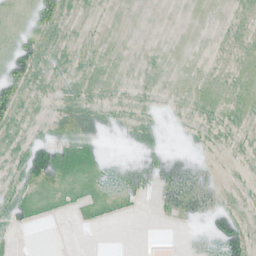

In [16]:
img = Image.fromarray(x)
img